# Chien luoc MA, ATR va mua 10 co phieu khi co tin hieu MUA

In [2]:
import yfinance as yf
import time 
import redis
import json
import pandas as pd
import numpy as np
import datetime

symbol = "VCB.VN"
start_date = "2023-12-01"
end_date = "2024-01-25"
ohlcv = yf.download(symbol, start=start_date, end=end_date, interval="15m")

# Chuyển dữ liệu thành DataFrame
data = pd.DataFrame(ohlcv, columns=['Open', 'High', 'Low', 'Close', 'Volume'])
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

# Tính MA và ATR
ma_fast_period = 50
ma_slow_period = 200
atr_period = 14
atr_threshold = 1000 # 1000 dong so voi gia thuc te 85 100

# Giả sử khởi tạo với số vốn ban đầu là 100,000,000 và mỗi lần mua 10 cổ phiếu
initial_capital = 10000000
shares_per_signal = 10
capital = initial_capital
shares_held = 0

data['MA_Fast'] = data['Close'].rolling(window=ma_fast_period).mean()
data['MA_Slow'] = data['Close'].rolling(window=ma_slow_period).mean()

data['TR'] = data['High'] - data['Low']
data['ATR'] = data['TR'].rolling(window=atr_period).mean()

# Xác định tín hiệu mua
data['Signal'] = np.where((data['MA_Fast'] > data['MA_Slow']) & (data['ATR'] <= atr_threshold), 1, 0)
data['Position'] = data['Signal'].shift()
data['Capital'] = capital
data['Shares_Held'] = shares_held

# Lặp qua mỗi hàng trong DataFrame
for index, row in data.iterrows():
    # Nếu có tín hiệu mua và có đủ vốn để mua
    if row['Position'] == 1 and capital >= row['Close'] * shares_per_signal:
        # Mua cổ phiếu và cập nhật vốn và số cổ phiếu được giữ
        capital -= row['Close'] * shares_per_signal
        data.at[index, 'Capital'] = capital
        shares_held += shares_per_signal
        data.at[index, 'Shares_Held'] = shares_held
    else:
        data.at[index, 'Capital'] = capital
        data.at[index, 'Shares_Held'] = shares_held

    # Cập nhật giá trị hiện tại của vốn dựa trên số cổ phiếu đang giữ và giá đóng cửa hiện tại
    current_value = capital + shares_held * row['Close']

data.to_csv('Buoi 9.2 Thuc hanh 1-2-3-4 MA, ATR Chung khoan 1.csv')

# Ngày vào lệnh
first_entry_date = data[data['Position'] == 1].index.min()

# Tính lợi nhuận
profit = current_value - initial_capital

print(f"Ngày vào lệnh đầu tiên: {first_entry_date}")
print(f'Tổng lợi nhuận: {profit}')
print(f'Tổng giá trị tài khoản: {current_value}')

[*********************100%%**********************]  1 of 1 completed
Ngày vào lệnh đầu tiên: 2023-12-28 10:45:00
Tổng lợi nhuận: 984000.0
Tổng giá trị tài khoản: 10984000.0


In [3]:
data

,Open,High,Low,Close,Volume,MA_Fast,MA_Slow,TR,ATR,Signal,Position,Capital,Shares_Held
Datetime,,,,,,,,,,,,,
2023-12-01 09:15:00,84900.0,85000.0,84600.0,84700.0,46700,NaN,NaN,400.0,NaN,0,NaN,10000000,0
2023-12-01 09:30:00,84700.0,84700.0,84600.0,84700.0,14400,NaN,NaN,100.0,NaN,0,0.0,10000000,0
2023-12-01 09:45:00,84700.0,84700.0,84500.0,84500.0,36200,NaN,NaN,200.0,NaN,0,0.0,10000000,0
2023-12-01 10:00:00,84600.0,84600.0,84500.0,84500.0,21100,NaN,NaN,100.0,NaN,0,0.0,10000000,0
2023-12-01 10:15:00,84600.0,84600.0,84400.0,84500.0,46400,NaN,NaN,200.0,NaN,0,0.0,10000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24 13:30:00,92000.0,92000.0,91400.0,91400.0,203500,91964.0,89887.5,600.0,428.571429,1,1.0,52000,120
2024-01-24 13:45:00,91500.0,91500.0,91400.0,91500.0,98700,91946.0,89912.0,100.0,364.285714,1,1.0,52000,120
2024-01-24 14:00:00,91500.0,91500.0,91000.0,91200.0,135700,91924.0,89934.5,500.0,400.000000,1,1.0,52000,120


# Ve bieu do chien luoc va thi truong

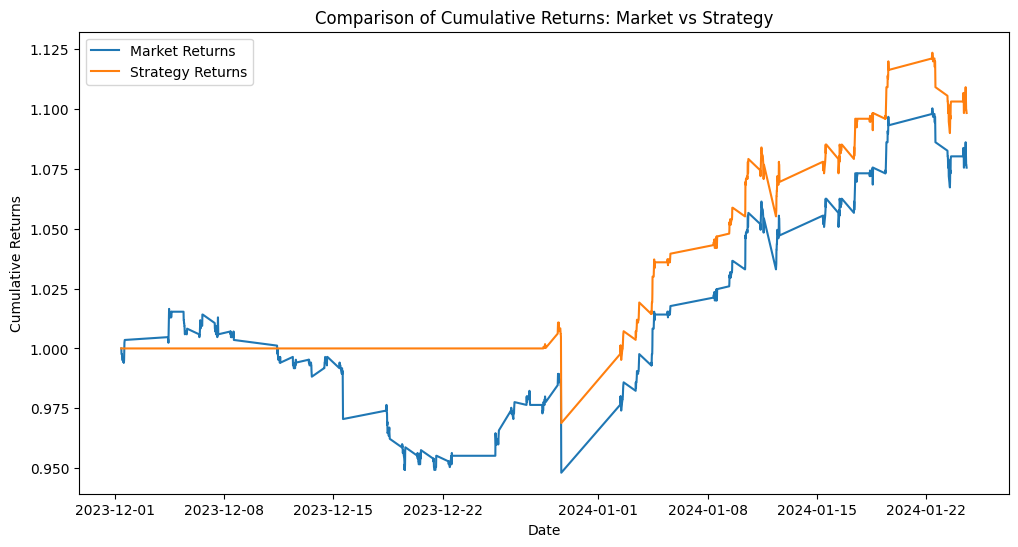

In [4]:
# Tính lợi nhuận lũy kế từ thị trường
data['Market_Return'] = data['Close'].pct_change()
data['Cumulative_Market_Returns'] = (1 + data['Market_Return']).cumprod()

# Tính lợi nhuận lũy kế từ chiến lược
data['Strategy_Value'] = data['Capital'] + data['Shares_Held'] * data['Close']
data['Cumulative_Strategy_Returns'] = data['Strategy_Value'] / initial_capital

data.to_csv('Buoi 9.2 Thuc hanh 1-2-3-4 MA, ATR Chung khoan 2.csv')

# Vẽ biểu đồ so sánh lợi nhuận lũy kế từ thị trường và từ chiến lược
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title('Comparison of Cumulative Returns: Market vs Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()